In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [34]:
df_ethereum = pd.read_csv('C:/Users/cecig/OneDrive/Documentos/GitHub/ponderada-cripto/src/dados/ethereum_365days.csv')

## GRU

In [35]:
# Normalizar os dados
scaler = MinMaxScaler()
df_ethereum[['close']] = scaler.fit_transform(df_ethereum[['close']])

# Criar sequências temporais
def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(df_ethereum['close'].values, window_size)

# Separar em treino e teste
X_train, X_test = X[:int(0.8 * len(X))], X[int(0.8 * len(X)):]
y_train, y_test = y[:int(0.8 * len(y))], y[int(0.8 * len(y)):]

# Criar e treinar o modelo GRU
model_gru = Sequential()
model_gru.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_gru.add(GRU(50))
model_gru.add(Dense(1))

model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(X_train, y_train, epochs=10, batch_size=32)

# Fazer previsões
y_pred = model_gru.predict(X_test)

Epoch 1/10


c:\Users\cecig\OneDrive\Documentos\GitHub\ponderada-cripto\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1903
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0247
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0085
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0115
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0051
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0051
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0040
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0037
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0039
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step


## Arima

In [36]:
# Ajustar o modelo ARIMA
model_arima = ARIMA(df_ethereum['close'], order=(5, 1, 2))  # Exemplo de parâmetros
model_arima_fit = model_arima.fit()

# Prever os próximos 30 dias
forecast_arima = model_arima_fit.forecast(steps=30)

## Holt-Winters

In [37]:
# Ajustar o modelo Holt-Winters
model_hw = ExponentialSmoothing(df_ethereum['close'], trend='add', seasonal='add', seasonal_periods=7)
model_hw_fit = model_hw.fit()

# Prever os próximos 30 dias
forecast_hw = model_hw_fit.forecast(steps=30)

## Previsões Modelos ARIMA e Holt-Winter

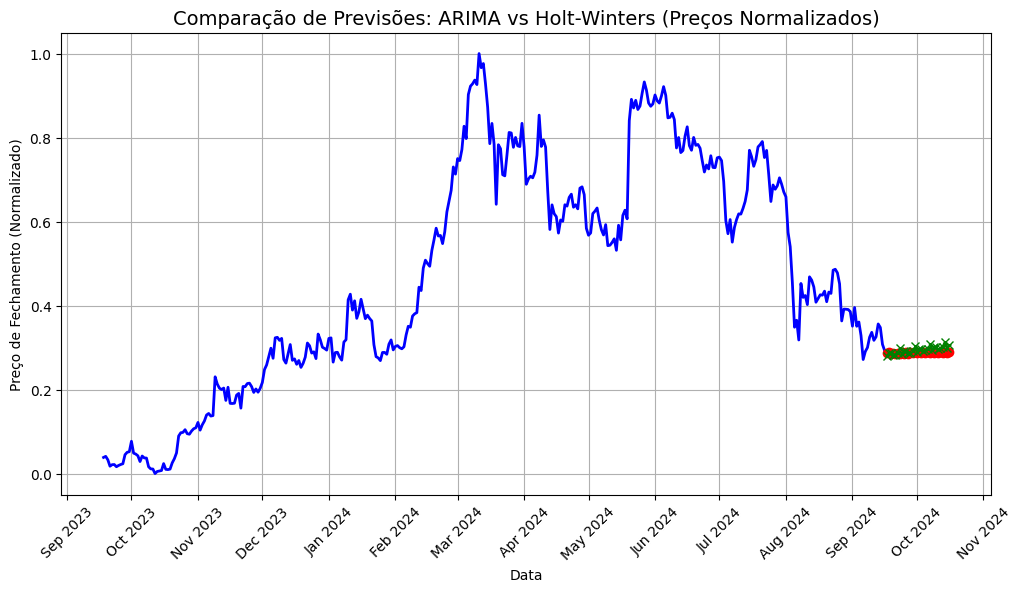

In [38]:
# Importar bibliotecas
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Configurar o tamanho da figura
plt.figure(figsize=(12, 6))

# Plotar os dados observados
df_ethereum['timestamp'] = pd.to_datetime(df_ethereum['timestamp'])

plt.plot(df_ethereum['timestamp'], df_ethereum['close'], label='Observado', color='blue', linewidth=2)

# Gerar a faixa de datas a partir do último 'timestamp'
last_date = df_ethereum['timestamp'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=len(forecast_arima) + 1)

# Plotar as previsões ARIMA e Holt-Winters com estilos diferentes
plt.plot(future_dates[1:], forecast_arima, label='Previsão ARIMA', color='red', linestyle='--', marker='o')
plt.plot(future_dates[1:], forecast_hw, label='Previsão Holt-Winters', color='green', linestyle='-.', marker='x')

# Melhorar a legibilidade do eixo x com datas formatadas
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
plt.xticks(rotation=45)

# Adicionar título e rótulos aos eixos
plt.title('Comparação de Previsões: ARIMA vs Holt-Winters (Preços Normalizados)', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (Normalizado)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
plt.xticks(rotation=45)

plt.grid(True)
plt.show()


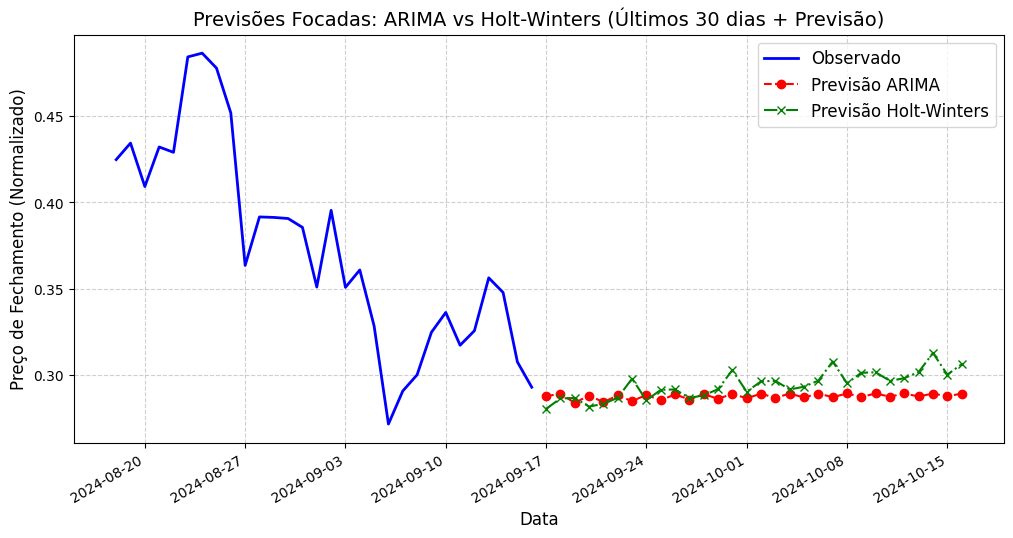

In [39]:
# Importar bibliotecas
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Configurar o tamanho da figura
plt.figure(figsize=(12, 6))

# Exibir apenas os últimos 30 dias de dados observados
num_last_days = 30
df_ethereum_last_days = df_ethereum.tail(num_last_days)

# Plotar os últimos dias de dados observados
plt.plot(df_ethereum_last_days['timestamp'], df_ethereum_last_days['close'], label='Observado', color='blue', linewidth=2)

# Gerar a faixa de datas a partir do último 'timestamp' do conjunto de dados observado
last_date = df_ethereum_last_days['timestamp'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=len(forecast_arima) + 1)

# Plotar as previsões ARIMA e Holt-Winters com estilos diferentes
plt.plot(future_dates[1:], forecast_arima, label='Previsão ARIMA', color='red', linestyle='--', marker='o')
plt.plot(future_dates[1:], forecast_hw, label='Previsão Holt-Winters', color='green', linestyle='-.', marker='x')

# Melhorar a legibilidade do eixo x com datas formatadas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Ajustar para mostrar uma data por semana
plt.gcf().autofmt_xdate()  # Rotacionar as datas no eixo x

# Adicionar título e rótulos aos eixos
plt.title('Previsões Focadas: ARIMA vs Holt-Winters (Últimos 30 dias + Previsão)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço de Fechamento (Normalizado)', fontsize=12)

# Adicionar gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Adicionar legenda
plt.legend(loc='best', fontsize=12)

# Exibir o gráfico
plt.show()


In [51]:
import pandas as pd
import numpy as np

# Carregar o arquivo CSV
df_ethereum = pd.read_csv('C:/Users/cecig/OneDrive/Documentos/GitHub/ponderada-cripto/src/dados/ethereum_365days.csv')

# Convertendo 'timestamp' para datetime
df_ethereum['timestamp'] = pd.to_datetime(df_ethereum['timestamp'], format='%Y-%m-%d')

# Calcular o retorno diário
df_ethereum['daily_return'] = df_ethereum['close'].pct_change()

# Cálculo da volatilidade (usando o desvio padrão dos retornos diários)
df_ethereum['volatility'] = df_ethereum['daily_return'].rolling(window=20).std()

# Calcular as médias móveis (SMA)
df_ethereum['SMA_20'] = df_ethereum['close'].rolling(window=20).mean()
df_ethereum['SMA_50'] = df_ethereum['close'].rolling(window=50).mean()

# Calcular as Bandas de Bollinger
df_ethereum['Upper_Band'] = df_ethereum['SMA_20'] + 2 * df_ethereum['close'].rolling(window=20).std()
df_ethereum['Lower_Band'] = df_ethereum['SMA_20'] - 2 * df_ethereum['close'].rolling(window=20).std()

# Cálculo de Golden Cross e Death Cross
df_ethereum['golden_cross'] = np.where(df_ethereum['SMA_20'] > df_ethereum['SMA_50'], 1, 0)
df_ethereum['death_cross'] = np.where(df_ethereum['SMA_20'] < df_ethereum['SMA_50'], 1, 0)

# Remover NaNs
df_ethereum.dropna(inplace=True)

# Verificar as colunas adicionadas
print(df_ethereum.columns)


Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'daily_return',
       'volatility', 'SMA_20', 'SMA_50', 'Upper_Band', 'Lower_Band',
       'Golden_Cross', 'Death_Cross', 'Retorno_Diario'],
      dtype='object')


In [53]:
# Features e target
features = ['open', 'high', 'low', 'volume', 'volatility', 'SMA_20', 'SMA_50', 'Upper_Band', 'Lower_Band', 'golden_cross', 'death_cross', 'Retorno_Diario']
target = 'close'

X = df_ethereum[features]
y = df_ethereum[target]